Theta0 (intercept): 3.670
Theta1 (coef): 1.660


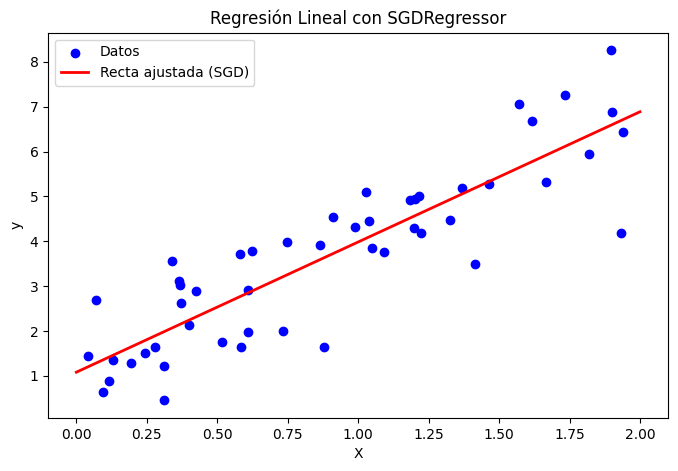

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# --------------------------
# 1. Generar datos sintéticos
# --------------------------
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)           # X entre 0 y 2
true_theta0 = 1
true_theta1 = 3
y = true_theta0 + true_theta1 * X + np.random.randn(m, 1)  # ruido

# --------------------------
# 2. Escalar X (recomendado para SGD)
# --------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------------------------
# 3. Crear y entrenar SGDRegressor
# --------------------------
model = SGDRegressor(
    max_iter=1000,
    learning_rate='constant',
    eta0=0.01,       # tasa de aprendizaje
    tol=1e-6,
    random_state=42
)
model.fit(X_scaled, y.ravel())

# Parámetros aprendidos
theta1 = model.coef_[0]
theta0 = model.intercept_[0]
print(f"Theta0 (intercept): {theta0:.3f}")
print(f"Theta1 (coef): {theta1:.3f}")

# --------------------------
# 4. Predicción
# --------------------------
X_new_scaled = scaler.transform(np.array([[0],[2]]))
y_pred = model.predict(X_new_scaled)

# --------------------------
# 5. Visualización
# --------------------------
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(np.array([[0],[2]]), y_pred, color='red', linewidth=2, label='Recta ajustada (SGD)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal con SGDRegressor')
plt.legend()
plt.show()
